Un notebook propre et commenté (introduction,
analyses, conclusion, etc) contenant : le procédé de
développement de votre outil, du prétraitement à la
modélisation des données, en passant par l’analyse
exploratoire.

Pensez à répondre à la problématique.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Import et visualisation

In [2]:
df = pd.read_csv('data\\raw\\marketing_campaign.csv' , sep='\t', index_col = 0)
pd.set_option('display.max_columns', None)

# df.info()

In [3]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

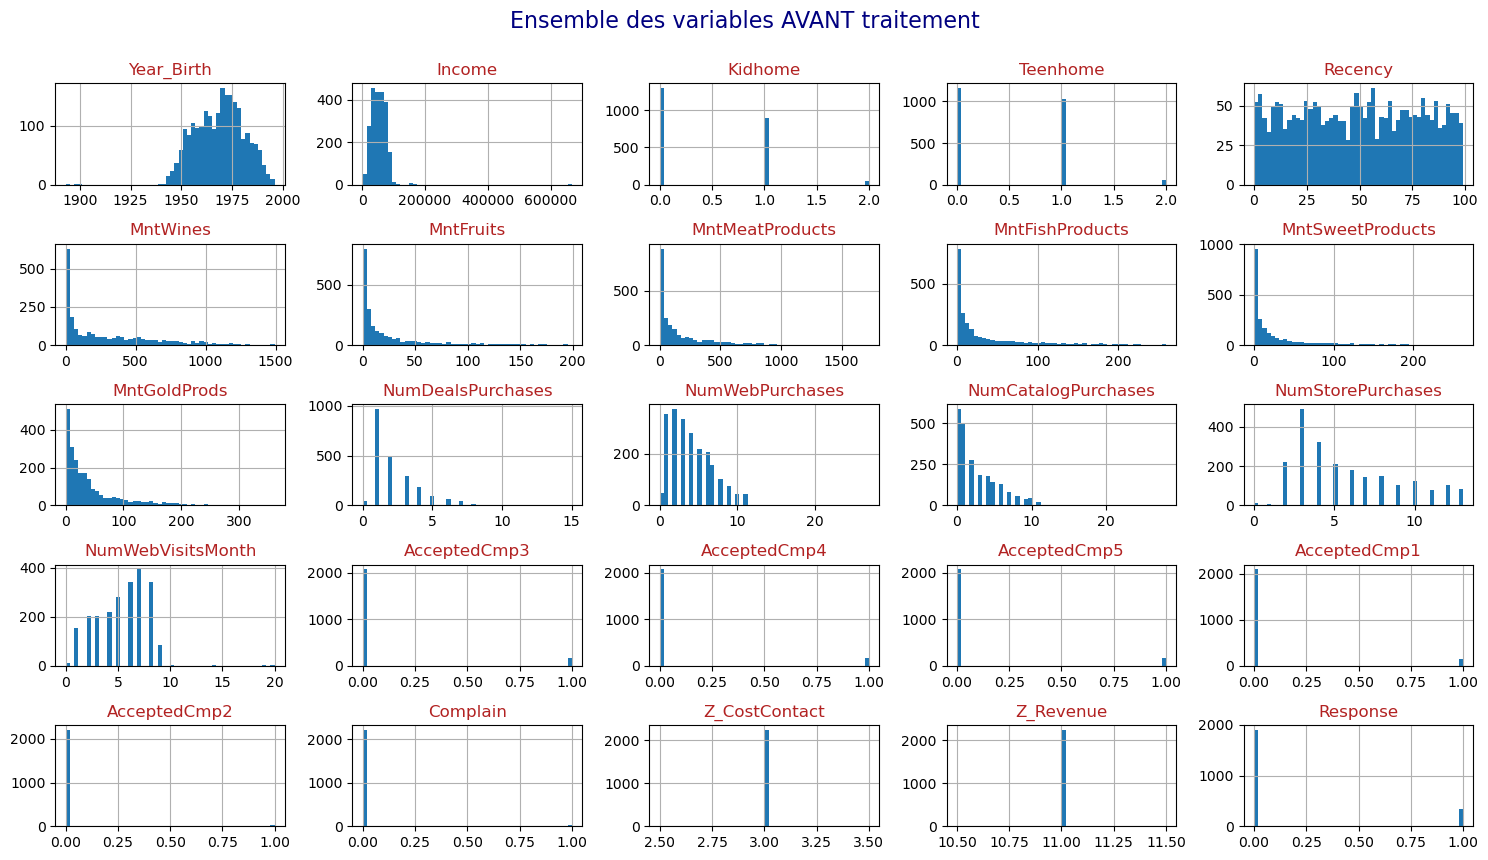

In [4]:
axes = df.hist(bins=50, figsize=(15,9))
plt.suptitle("Ensemble des variables AVANT traitement", fontsize=16, color="navy")
# Modifier la couleur des titres individuels
for ax in axes.ravel():  # ravel() aplatit la grille d'axes
    ax.set_title(ax.get_title(), color='firebrick')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [5]:
# df.head()

In [6]:
# df.describe()

In [7]:
# df.describe(include=['object', 'category', 'bool', 'datetime'])

In [8]:
# # # toutes les dt_customers sont situés entre 2012 et 2015
# df[(df['Dt_Customer'] > '01-01-2015') | (df['Dt_Customer'] < '01-01-2012')]

## Nettoyage

In [9]:
df_clean = df.copy()

#### Valeurs manquantes

In [10]:
# Recherche des null, il y en a dans Income
# df_clean.isnull().sum()

# supprime toutes les lignes du DataFrame df_clean où la colonne Income contient une valeur manquante
df_clean = df_clean.dropna(subset=['Income'])

#### Valeurs abérantes

In [11]:
# Cette observation est-elle une abération ? 
df_clean.loc[df_clean['Year_Birth']==1900]
df_clean.loc[7829]


Year_Birth                   1900
Education                2n Cycle
Marital_Status           Divorced
Income                    36640.0
Kidhome                         1
Teenhome                        0
Dt_Customer            26-09-2013
Recency                        99
MntWines                       15
MntFruits                       6
MntMeatProducts                 8
MntFishProducts                 7
MntSweetProducts                4
MntGoldProds                   25
NumDealsPurchases               1
NumWebPurchases                 2
NumCatalogPurchases             1
NumStorePurchases               2
NumWebVisitsMonth               5
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        1
Z_CostContact                   3
Z_Revenue                      11
Response                        0
Name: 7829, dtype: object

In [12]:
# certaines données sont erronées pour les années de naissance
# au lieu d'etre a 1900 c'est a 1800, ou 1900 au lieu de 2000
df_clean[df_clean['Year_Birth'] < 1900]['Year_Birth']
# On les affiche
df_clean.loc[[11004, 1150]]
# On les corrige
df_clean.loc[11004, 'Year_Birth'] = 1993
df_clean.loc[1150, 'Year_Birth'] = 1999
df_clean.loc[7829, 'Year_Birth'] = 2000

#### Typage

In [13]:
# passage de la colonne Dt_Customer en datetime
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format="%d-%m-%Y", errors='coerce')
df_clean['Year_Birth'] = pd.to_datetime(df_clean['Year_Birth'], format="%Y")


In [14]:
# df_clean['Dt_Customer'].dtype
# df_clean['Year_Birth'].dtype

In [15]:
# axes = df_clean.hist(bins=50, figsize=(15,9))
# plt.suptitle("Valeurs de l'ensemble des variables", fontsize=16, color="navy")
# # Modifier la couleur des titres individuels
# for ax in axes.ravel():  # ravel() aplatit la grille d'axes
#     ax.set_title(ax.get_title(), color='firebrick')

# plt.tight_layout(rect=[0, 0.03, 1, 0.98])
# plt.show()

In [16]:
df_clean['Age'] = datetime.today().year - df_clean['Year_Birth'].dt.year
df_clean['Customer_Seniority'] = datetime.today().year - df_clean['Dt_Customer'].dt.year

In [17]:
df_clean.drop(['Z_Revenue','Z_CostContact', 'Year_Birth', 'Dt_Customer'], axis=1, inplace= True)

## Standardisation

In [18]:
to_std = ['Income',
        'Customer_Seniority', 
        'MntWines', 
        'MntFruits', 
        'MntMeatProducts', 
        'MntFishProducts', 
        'MntSweetProducts', 
        'MntGoldProds',
        'NumDealsPurchases',
        'NumWebPurchases',
        'NumCatalogPurchases',
        'NumStorePurchases',
        'NumWebVisitsMonth' ]


In [20]:
df_clean.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Customer_Seniority'],
      dtype='object')

- moyenne ≈ 0
- écart-type ≈ 1.

In [22]:
df_scaled = df_clean.copy()
scaler = StandardScaler()
df_scaled[to_std] = scaler.fit_transform(df_clean[to_std])

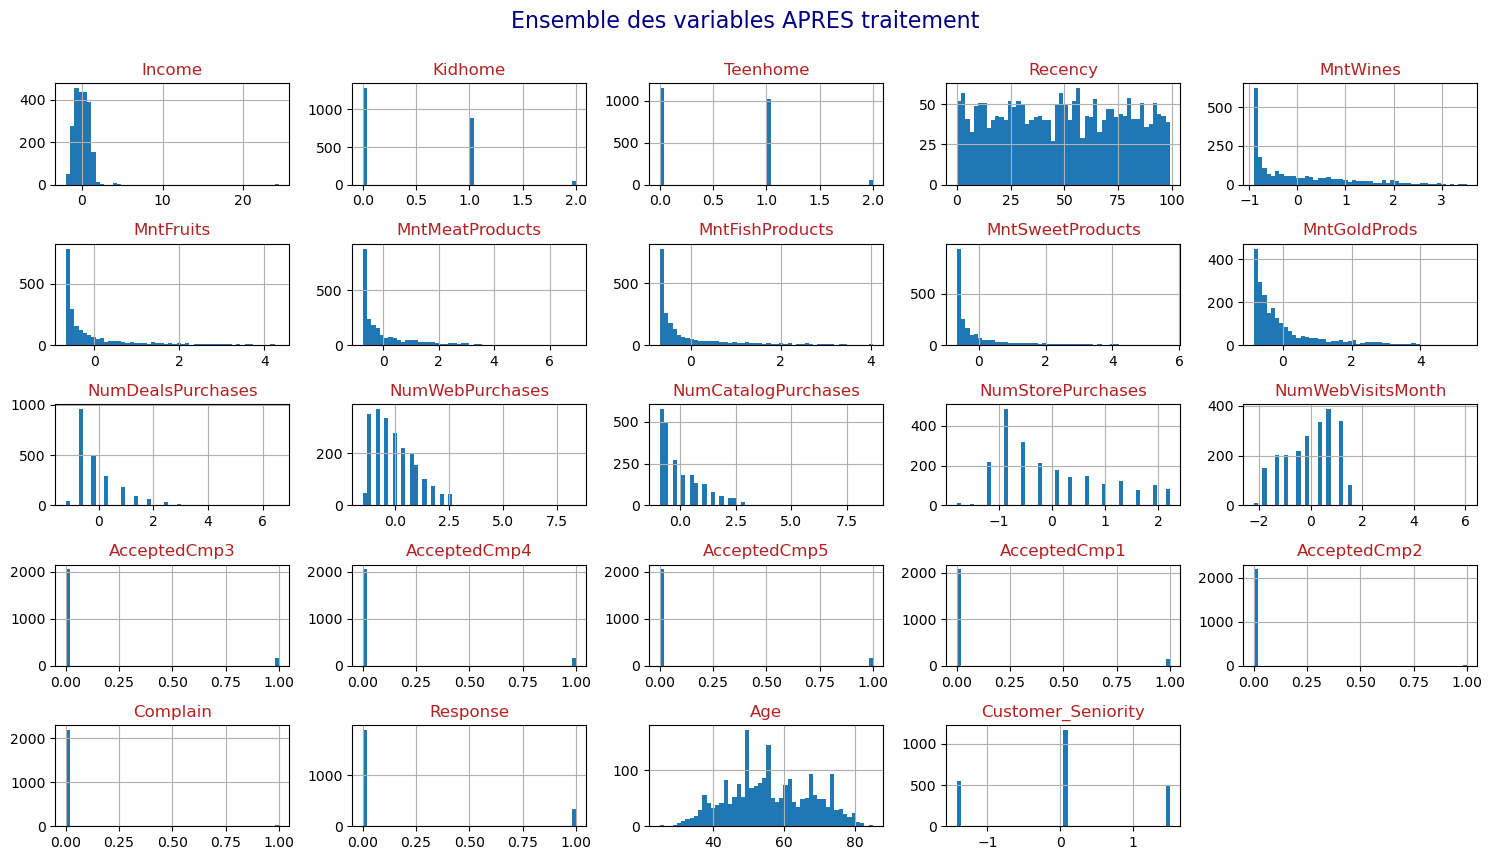

In [23]:
axes = df_scaled.hist(bins=50, figsize=(15,9))
plt.suptitle("Ensemble des variables APRES traitement", fontsize=16, color="navy")
# Modifier la couleur des titres individuels
for ax in axes.ravel():  # ravel() aplatit la grille d'axes
    ax.set_title(ax.get_title(), color='firebrick')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [ ]:
# # Séparation des valeurs numériques et des strings
# df_num = df.select_dtypes(include=['int64', 'float64'])
# df_str = df.select_dtypes(include=['object'])

# # Standardiser et PCA sur numériques car on ne peux pas le faire sur des Chaines de caractères
# scaler = StandardScaler()
# df_num_scaled = scaler.fit_transform(df_num)

# pca = PCA(n_components=5)
# df_pca = pca.fit_transform(df_num_scaled)

# # Transformer en dataframe avec noms de colonnes
# df_num_pca_and_scaled = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# # Recomposer dataframe final
# marketing_campaign_clean = pd.concat([df_num_pca_and_scaled, df_str.reset_index(drop=True)], axis=1)
# marketing_campaign_clean.to_csv('data\\processed\\marketing_campaign_clean.csv', index=False, sep=',')